# DecisionTree with Classification

## 1. Collect the Data

In [8]:
import pandas as pd
df= pd.read_csv("/content/sample_data/loan.csv")
df.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [10]:
df.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-21-1856d5e53189>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(data = loan, x = 'Default', y = 'Income',palette="colorblind")


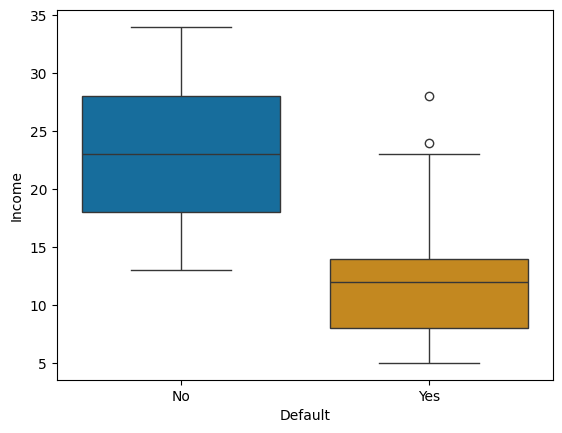

In [21]:
plot = sns.boxplot(data = loan, x = 'Default', y = 'Income',palette="colorblind")

<ipython-input-16-d388eacebe0f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount',palette="colorblind")


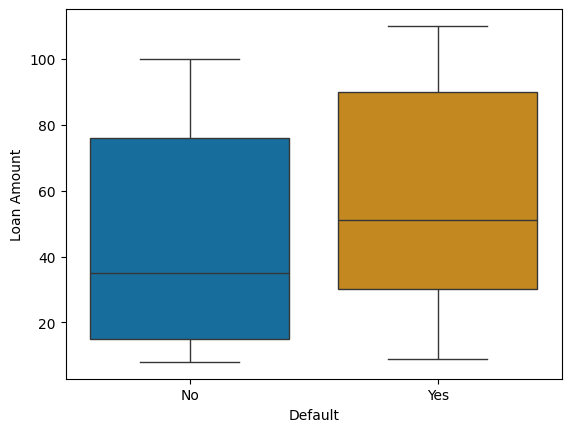

In [16]:
plot = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount',palette="colorblind")

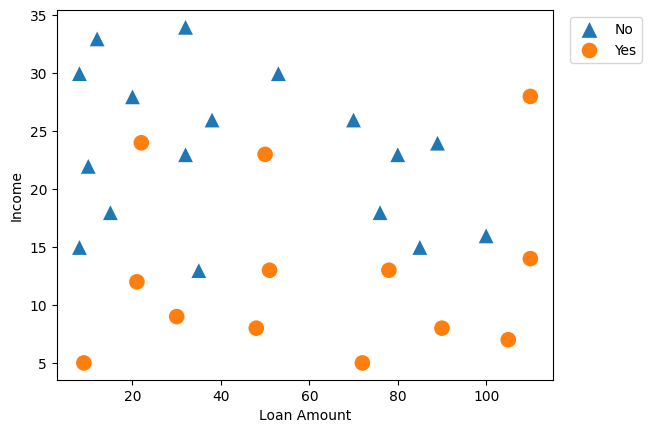

In [31]:
plot = sns.scatterplot(data = loan,
                     x = 'Loan Amount',
                     y = 'Income',
                     hue = 'Default',
                     style = 'Default',
                     markers = ['^','o'],
                     s = 150)
plot= plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [54]:
y= df[["Default"]]

In [55]:
X =df[["Income","Loan Amount"]]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234)

In [62]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [64]:
model= classifier.fit(X_train,y_train)

In [65]:
model.score(X_test,y_test)

0.5

## 5. Visualize the Classification Tree

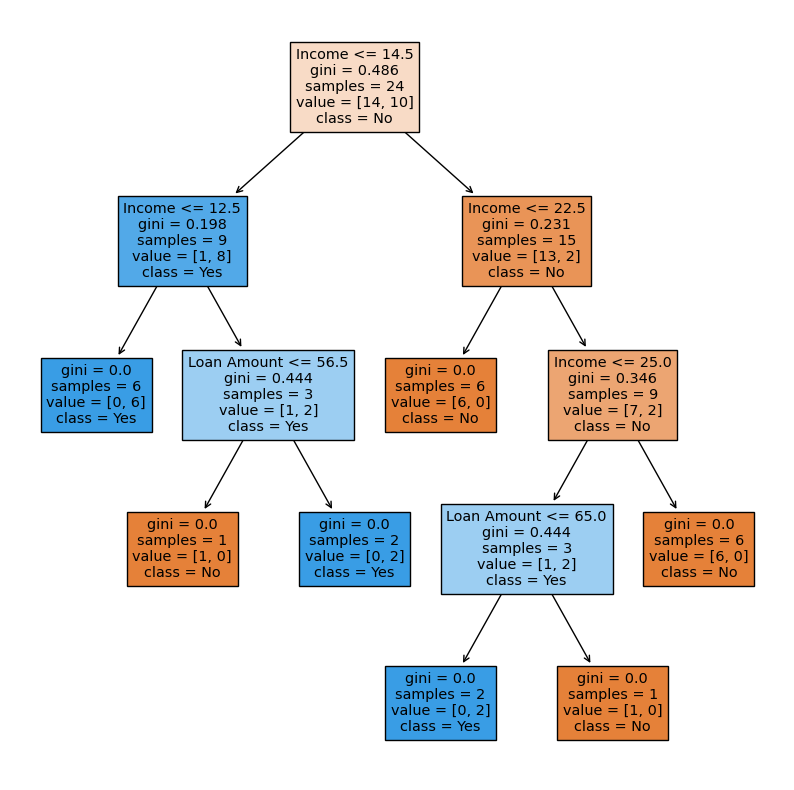

In [66]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(model,
               feature_names= list(X.columns),
               class_names =["No","Yes"],
               filled=True);

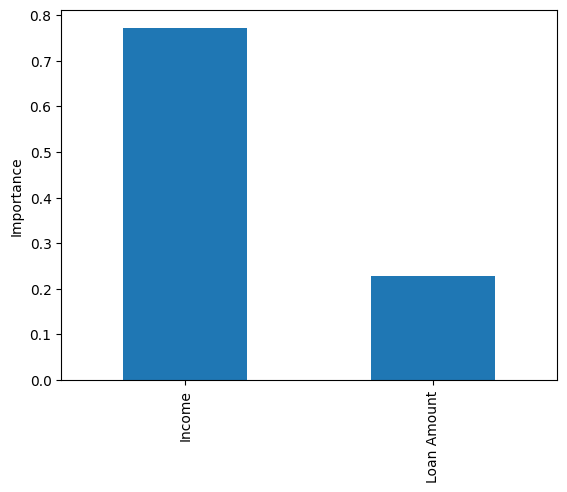

In [67]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [68]:
model.score(X_train, y_train)

1.0

In [69]:
model.score(X_test, y_test)

0.5

In [75]:
grid = {"max_depth": [2,3,4,5],
        "min_samples_split": [2,3,4],
        "min_samples_leaf":[1,2,3,4,5,6]}

In [76]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [77]:
model_ =gcv.best_estimator_
model_.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [78]:
model_.score(X_train, y_train)

0.875

In [79]:
model_.score(X_test, y_test)

0.8333333333333334

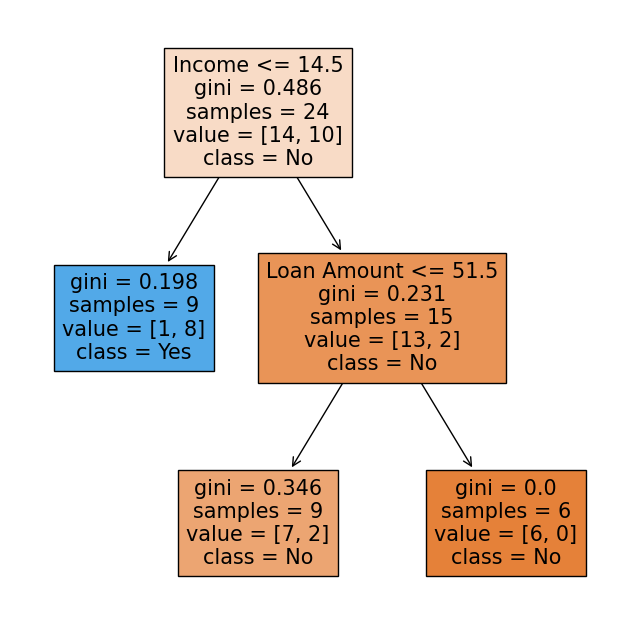

In [80]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_,
                   feature_names = list(X.columns),
                   class_names = ['No','Yes'],
                   filled = True);